# Análise exploratória de dados

In [36]:
import pandas as pd

## 1. Descrição dos dados

In [37]:
# Abrir o dataset para análise
file_path = '../data/raw/data.csv'
orange_data = pd.read_csv(file_path)

# Exibir as primeiras linhas e informações do dataset
orange_data.head(), orange_data.info()

# Criar Dicionario de dados
dicionario_dados = pd.DataFrame( {
    'Size (cm)': {
        'variavel': 'Size (cm)',
        'descricao': 'Tamanho da laranja em centímetros',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    'Weight (g)': {
        'variavel': 'Weight (g)',
        'descricao': 'Peso da laranja em gramas',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    'Brix (Sweetness)': {
        'variavel': 'Brix (Sweetness)',
        'descricao': 'Nível de doçura da laranja medido pelo índice Brix',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    'pH (Acidity)': {
        'variavel': 'pH (Acidity)',
        'descricao': 'Nível de acidez da laranja',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    'Softness (1-5)': {
        'variavel': 'Softness (1-5)',
        'descricao': 'Grau de maciez da laranja em uma escala de 1 a 5',
        'tipo': 'quantitativa',
        'subtipo': 'discreta'
    },
    'HarvestTime (days)': {
        'variavel': 'HarvestTime (days)',
        'descricao': 'Tempo de colheita em dias',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    'Ripeness (1-5)': {
        'variavel': 'Ripeness (1-5)',
        'descricao': 'Grau de maturação da laranja em uma escala de 1 a 5',
        'tipo': 'quantitativa',
        'subtipo': 'discreta'
    },
    'Color': {
        'variavel': 'Color',
        'descricao': 'Cor da laranja, representando diferentes tonalidades (ex: Orange, Deep Orange)',
        'tipo': 'qualitativa',
        'subtipo': 'nominal'
    },
    'Variety': {
        'variavel': 'Variety',
        'descricao': 'Variedade da laranja (ex: Valencia, Navel)',
        'tipo': 'qualitativa',
        'subtipo': 'nominal'
    },
    'Blemishes (Y/N)': {
        'variavel': 'Blemishes (Y/N)',
        'descricao': 'Presença de manchas na laranja, indicando se há defeitos visuais (ex: Y, N)',
        'tipo': 'qualitativa',
        'subtipo': 'nominal'
    },
    'Quality (1-5)': {
        'variavel': 'Quality (1-5)',
        'descricao': 'Qualidade da laranja em uma escala de 1 a 5',
        'tipo': 'quantitativa',
        'subtipo': 'discreta'
    }
})

# Salvar dicionário de dados
dicionario_dados.to_csv('../data/external/dictionary.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


## 2. Perguntas de partida e hipóteses

### Perguntas da Sprint

1. Como a maciez das laranjas varia com o tempo de colheita e o estágio de maturação? Laranjas mais maduras são sempre mais macias?

2. A cor das laranjas está relacionada à sua qualidade? Quais tonalidades são indicativas de maior qualidade?

3. Qual é a influência das manchas na avaliação da qualidade das laranjas?

4. Como o tempo de colheita afeta as características das laranjas? Existem períodos ideais para a colheita que maximizam a qualidade?

5. A presença de manchas afeta o pH ou a doçura das laranjas? Isso poderia indicar alguma relação entre defeitos visuais e características internas da fruta.


## 3. Insights

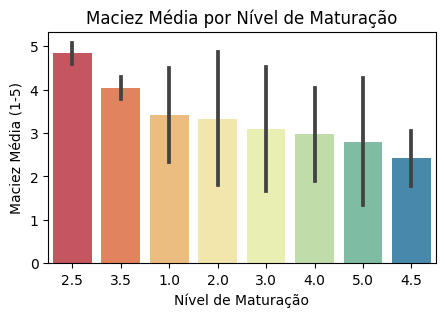

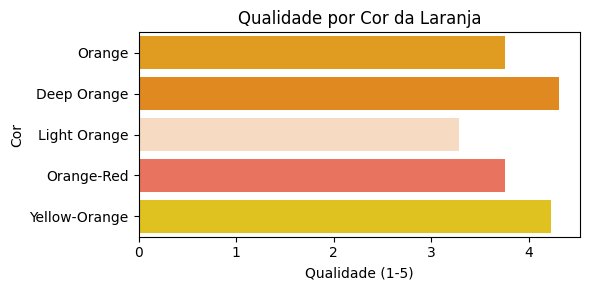

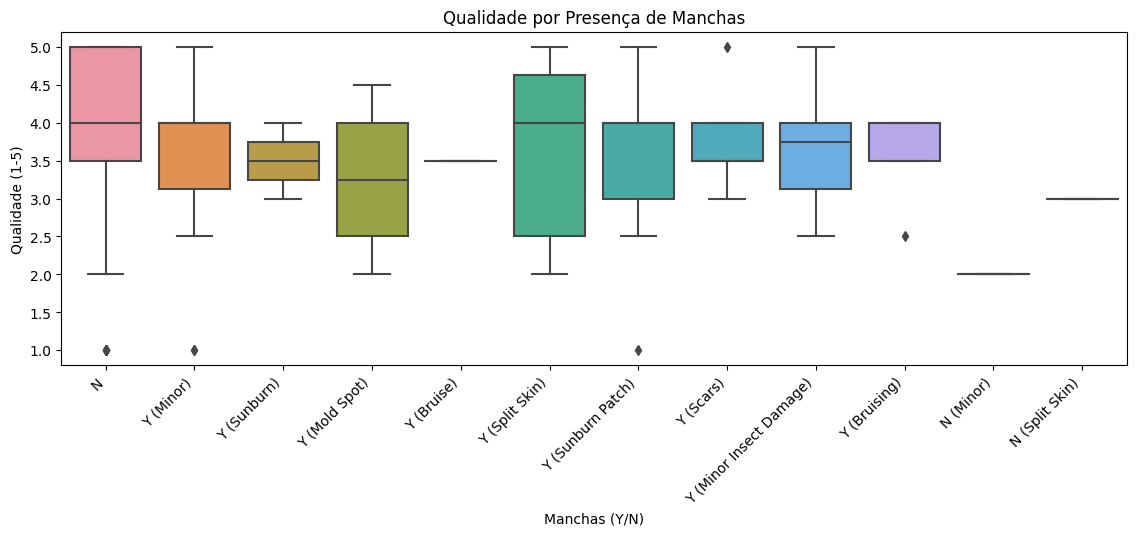

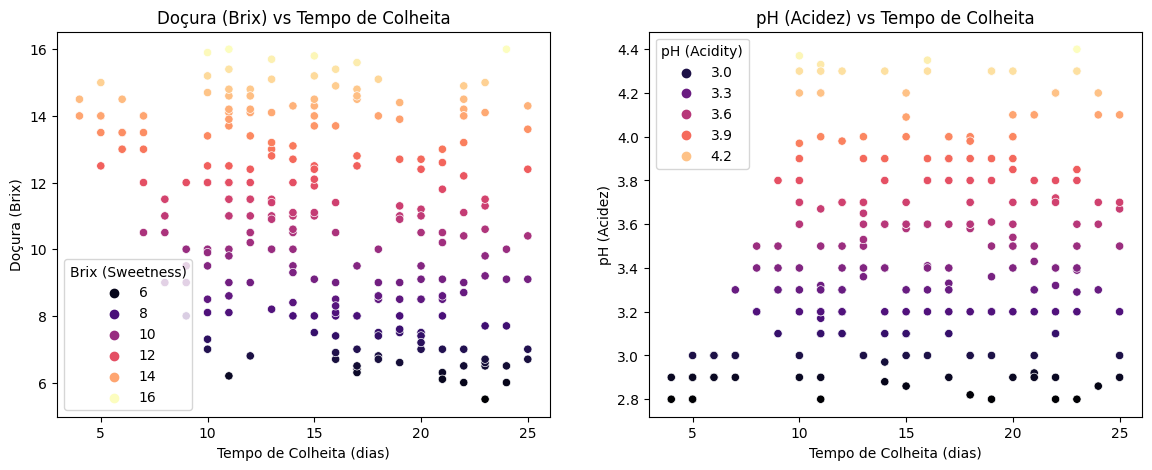

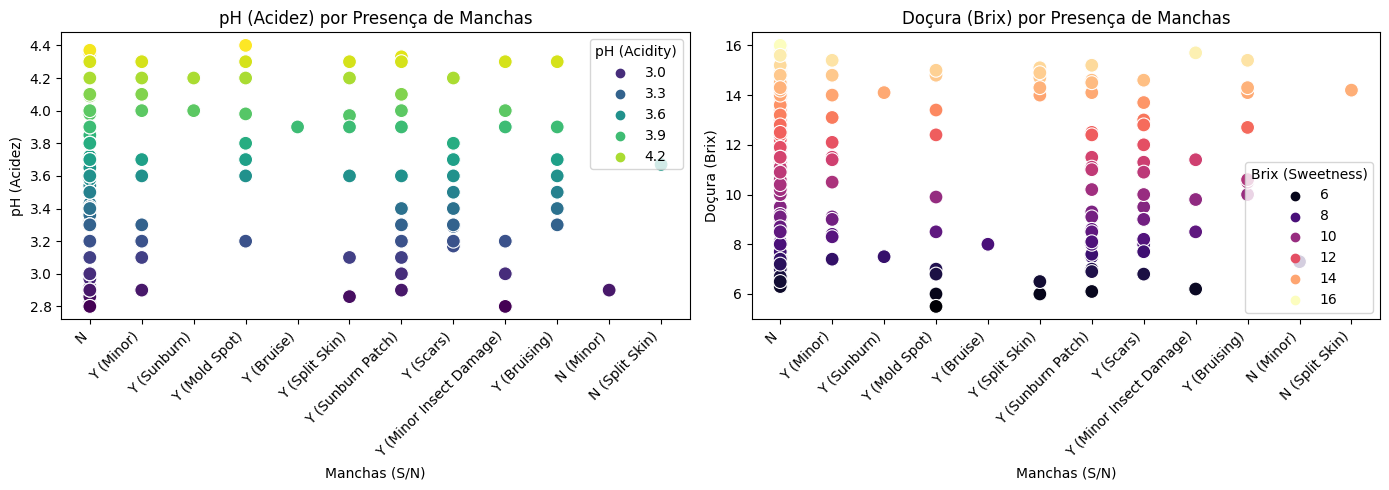

<Figure size 640x480 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

cores_personalizadas = {
    'Orange': 'orange',
    'Deep Orange': 'darkorange',
    'Light Orange': 'peachpuff',
    'Orange-Red': 'tomato',
    'Yellow-Orange': 'gold'
}

# Insight 1
# Calculando a média de maciez por nível de maturação e ordenando do maior para o menor
maturity_order = orange_data.groupby('Ripeness (1-5)')['Softness (1-5)'].mean().sort_values(ascending=False).index

# Gráfico de Barras para Maciez Média por Nível de Maturação, ordenado e com cores personalizadas
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=orange_data, x='Ripeness (1-5)', y='Softness (1-5)', order=maturity_order, ci="sd", ax=ax, palette="Spectral")
ax.set_title("Maciez Média por Nível de Maturação")
ax.set_xlabel("Nível de Maturação")
ax.set_ylabel("Maciez Média (1-5)")

# Insight 2
fig2, ax2 = plt.subplots(figsize=(6, 3))
sns.barplot(
    data=orange_data, 
    y='Color', 
    x='Quality (1-5)', 
    ci=None, 
    ax=ax2, 
    orient='h', 
    palette=cores_personalizadas
)

ax2.set_title("Qualidade por Cor da Laranja")
ax2.set_xlabel("Qualidade (1-5)")
ax2.set_ylabel("Cor")
plt.tight_layout()
plt.show()

# Insight 3
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=orange_data, x='Blemishes (Y/N)', y='Quality (1-5)', ax=ax)
ax.set_title("Qualidade por Presença de Manchas")
ax.set_xlabel("Manchas (Y/N)")
ax.set_ylabel("Qualidade (1-5)")

plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad=3.0)

# Insight 4
fig4, (ax4, ax5) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de dispersão para Doçura (Brix) vs Tempo de Colheita
sns.scatterplot(data=orange_data, x='HarvestTime (days)', y='Brix (Sweetness)', ax=ax4, hue='Brix (Sweetness)', palette="magma")
ax4.set_title("Doçura (Brix) vs Tempo de Colheita")
ax4.set_xlabel("Tempo de Colheita (dias)")
ax4.set_ylabel("Doçura (Brix)")

# Gráfico de dispersão para pH (Acidez) vs Tempo de Colheita
sns.scatterplot(data=orange_data, x='HarvestTime (days)', y='pH (Acidity)', ax=ax5, hue='pH (Acidity)', palette="magma")
ax5.set_title("pH (Acidez) vs Tempo de Colheita")
ax5.set_xlabel("Tempo de Colheita (dias)")
ax5.set_ylabel("pH (Acidez)")

# Insight 5
fig5, (ax6, ax7) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de dispersão para pH (Acidez) por Presença de Manchas
sns.scatterplot(data=orange_data, x='Blemishes (Y/N)', y='pH (Acidity)', ax=ax6, hue='pH (Acidity)', palette="viridis", s=100)
ax6.set_title("pH (Acidez) por Presença de Manchas")
ax6.set_xlabel("Manchas (S/N)")
ax6.set_ylabel("pH (Acidez)")
plt.setp(ax6.get_xticklabels(), rotation=45, ha='right')

# Gráfico de dispersão para Doçura (Brix) por Presença de Manchas
sns.scatterplot(data=orange_data, x='Blemishes (Y/N)', y='Brix (Sweetness)', ax=ax7, hue='Brix (Sweetness)', palette="magma", s=100)
ax7.set_title("Doçura (Brix) por Presença de Manchas")
ax7.set_xlabel("Manchas (S/N)")
ax7.set_ylabel("Doçura (Brix)")
plt.setp(ax7.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout(pad=3.0)
plt.show()